# UnSupervised Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from unsupervisedModels.kMeans import KMeansModel
from Data_Processing import DataPreProcess

# Importing the Preprocessed Data

In [2]:
process=DataPreProcess()
features,labels=process.apply_unsupervised_processing()
features.shape

Initializing Data Preprocessing....

Detecting Nulls
The null in dataset are:
 NDVI01    0
NDVI02    0
NDVI03    0
NDVI04    0
NDVI05    0
NDVI06    0
NDVI07    0
NDVI08    0
NDVI09    0
NDVI10    0
NDVI11    0
NDVI12    0
label     0
year      0
dtype: int64
As there is no Null in Dataset so no removal us needed

     NDVI01    NDVI02    NDVI03    NDVI04    NDVI05    NDVI06    NDVI07  \
0  0.153184  0.222615  0.498528  0.611280  0.285032  0.112775  0.529626   
1  0.137897  0.106036  0.169626  0.330396  0.594655  0.227967  0.578199   
2  0.122481  0.088123  0.182121  0.376037  0.431042  0.350422  0.630027   
3  0.085279  0.091887  0.140729  0.243528  0.224835  0.046875  0.579180   
4  0.091678  0.094313  0.247900  0.367800  0.546883  0.476697  0.699308   

     NDVI08    NDVI09    NDVI10    NDVI11    NDVI12  
0  0.546617  0.604374  0.571359  0.620985  0.496628  
1  0.661604  0.783454  0.777313  0.729177  0.636792  
2  0.724557  0.844643  0.673307  0.736385  0.635118  
3  0.666857  0.61

(33096, 12)

# 1) K-Means Clustering 

- 1st we will implement the K-Means without PCA 
- After analyzing the performance without PCA we will apply PCA
- Lastly we will analyze with PCA performance

In [3]:
'''Initializing Data Dictionary'''
data={'X_train':features,'y_train':np.array(labels)}

### K-Means Clustering Initialization for without PCA


In [4]:
'''Initializing KMeans model'''
kmeans_model = KMeans(
    n_clusters=2,              # Number of clusters
    init="k-means++",          # Intelligent centroid initialization
    n_init=20,                 # Increase number of initialization runs
    max_iter=300,              # Maximum number of iterations
    random_state=42            # Ensure reproducibility
)
'''Passing The KMeans model and data to our own KMeansModel class'''
kmeans_without_pca = KMeansModel(data, kmeans_model)


### K-Means Clustering without PCA
- Without PCA we got 60% cluster purity
- Classification report and confussion matrix for each class are given below
- These results shows data our model lacks on class 0 which is rice
- Here we got 60% accuracy but other matrices for rice are not so good let's try with PCA

Cluster Purity: 0.6089

Classification Report:
              precision    recall  f1-score   support

        Rice       0.10      0.14      0.12      6025
      Cotton       0.79      0.71      0.75     27071

    accuracy                           0.61     33096
   macro avg       0.44      0.43      0.43     33096
weighted avg       0.66      0.61      0.63     33096



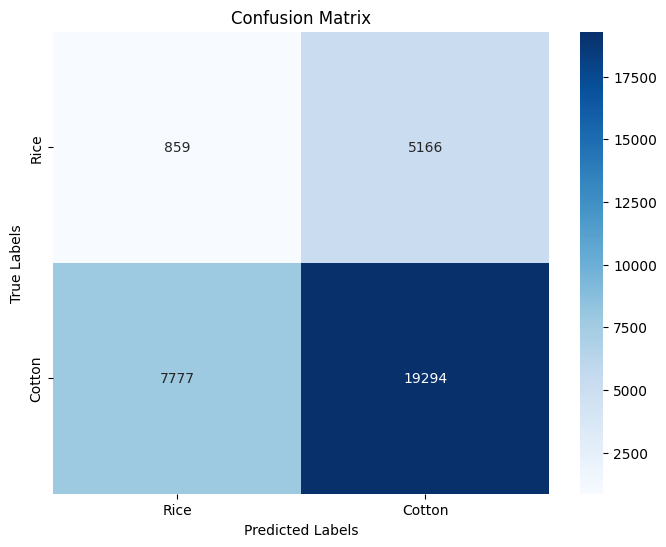

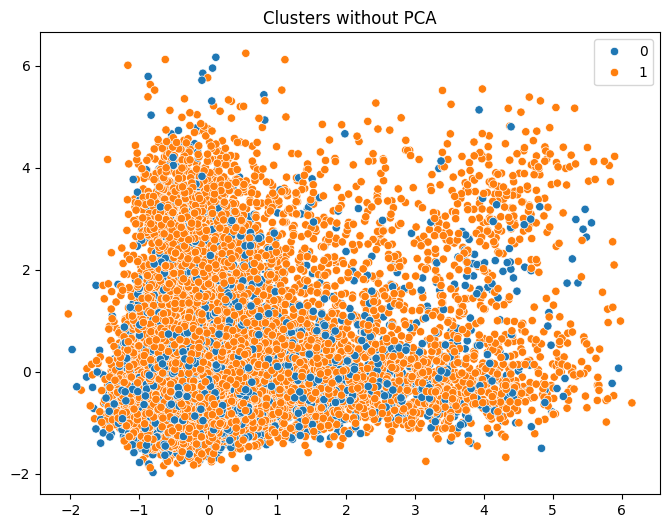

In [5]:
# Without PCA
results_without_pca = kmeans_without_pca.train_and_evaluate(use_pca=False)

### K-Means Clustering Initialization for with PCA


In [6]:
'''Initializing KMeans model'''
kmeans_model = KMeans(
    n_clusters=2,              # Number of clusters
    init="k-means++",          # Intelligent centroid initialization
    n_init=20,                 # Increase number of initialization runs
    max_iter=300,              # Maximum number of iterations
    random_state=42            # Ensure reproducibility
)
'''Passing The KMeans model and data to our own KMeansModel class'''
kmeans_with_pca = KMeansModel(data, kmeans_model)


### K-Means Clustering with PCA
- In this part we again got 60% cluster purity as without PCA
- But here we have compromised accuracy for other metrices like precision, recall, f1
- Our accuracy dropped to 40% but this model was able maintain balance between metrices for rice and cotton

Cluster Purity: 0.6084

Classification Report:
              precision    recall  f1-score   support

        Rice       0.21      0.86      0.34      6025
      Cotton       0.90      0.29      0.44     27071

    accuracy                           0.39     33096
   macro avg       0.56      0.57      0.39     33096
weighted avg       0.78      0.39      0.42     33096



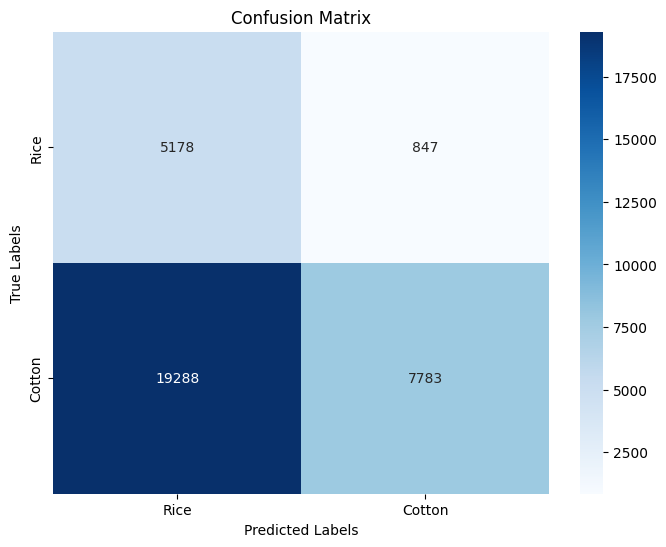

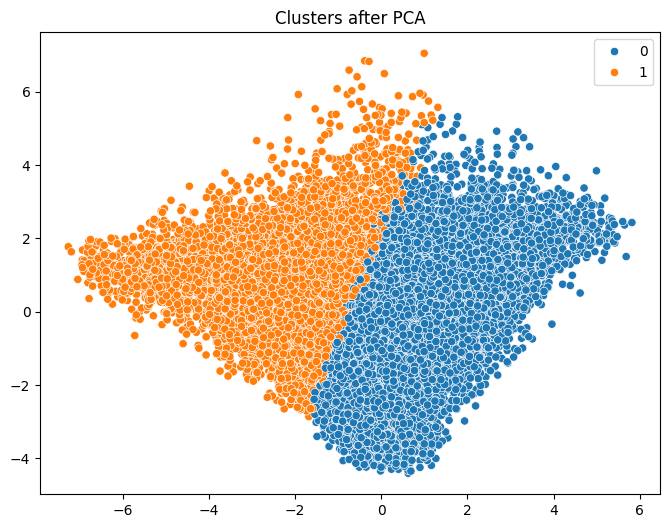

In [7]:
# With PCA
results_with_pca = kmeans_with_pca.train_and_evaluate(use_pca=True, n_components=8)

# 2) DBSCAN

# 3) GMM

# 4) Hierarchical Clustering

# Rough Work

In [3]:
cotton_2021_path = "Crop-dataset\\Cotton\\cotton2021.csv"
cotton_2022_path = "Crop-dataset\\Cotton\\cotton2022.csv"
cotton_2023_path = "Crop-dataset\\Cotton\\cotton2023.csv"
rice_2021_path = "Crop-dataset\\Rice\\rice2021.csv"
rice_2022_path = "Crop-dataset\\Rice\\rice2022.csv"
rice_2023_path = "Crop-dataset\\Rice\\rice2023.csv"

In [4]:
cotton_2021_df = pd.read_csv(cotton_2021_path)
cotton_2022_df = pd.read_csv(cotton_2022_path)
cotton_2023_df = pd.read_csv(cotton_2023_path)
rice_2021_df = pd.read_csv(rice_2021_path)
rice_2022_df = pd.read_csv(rice_2022_path)
rice_2023_df = pd.read_csv(rice_2023_path)

In [5]:
cotton_2021_df['label'] = 1 
cotton_2021_df['year'] = 2021 
rice_2021_df['label'] = 0
rice_2021_df['year'] = 2021
cotton_2022_df['label'] = 1 
cotton_2022_df['year'] = 2022 
rice_2022_df['label'] = 0
rice_2022_df['year'] = 2022
cotton_2023_df['label'] = 1 
cotton_2023_df['year'] = 2023
rice_2023_df['label'] = 0
rice_2023_df['year'] = 2023

In [6]:
combined_data = pd.concat([cotton_2021_df, rice_2021_df, cotton_2022_df, rice_2022_df, cotton_2023_df, rice_2023_df], axis=0)

In [7]:
combined_data.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,label,year
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,1,2021
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,1,2021
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,1,2021
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,1,2021
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,1,2021


In [8]:
combined_data['NDVI01'].shape

(33096,)

In [12]:
col=list(combined_data.columns)
print(col)

['NDVI01', 'NDVI02', 'NDVI03', 'NDVI04', 'NDVI05', 'NDVI06', 'NDVI07', 'NDVI08', 'NDVI09', 'NDVI10', 'NDVI11', 'NDVI12', 'label', 'year']


In [35]:
labels=combined_data['label']
combined_data.drop(['label','year'],axis=1,inplace=True)
combined_data.head(5)

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931


In [36]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
914    0
915    0
916    0
917    0
918    0
Name: label, Length: 33096, dtype: int64